In [1]:
import kernel_clustering as kc
from aeon.datasets import load_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics.cluster import rand_score
from scipy.ndimage import gaussian_filter1d
import matplotlib.pyplot as plt

In [2]:
X, y = load_classification("SharePriceIncrease")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
X_train = X_train.reshape(X_train.shape[0], -1)
y_train = y_train.reshape(y_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
y_test = y_test.reshape(y_test.shape[0], -1)

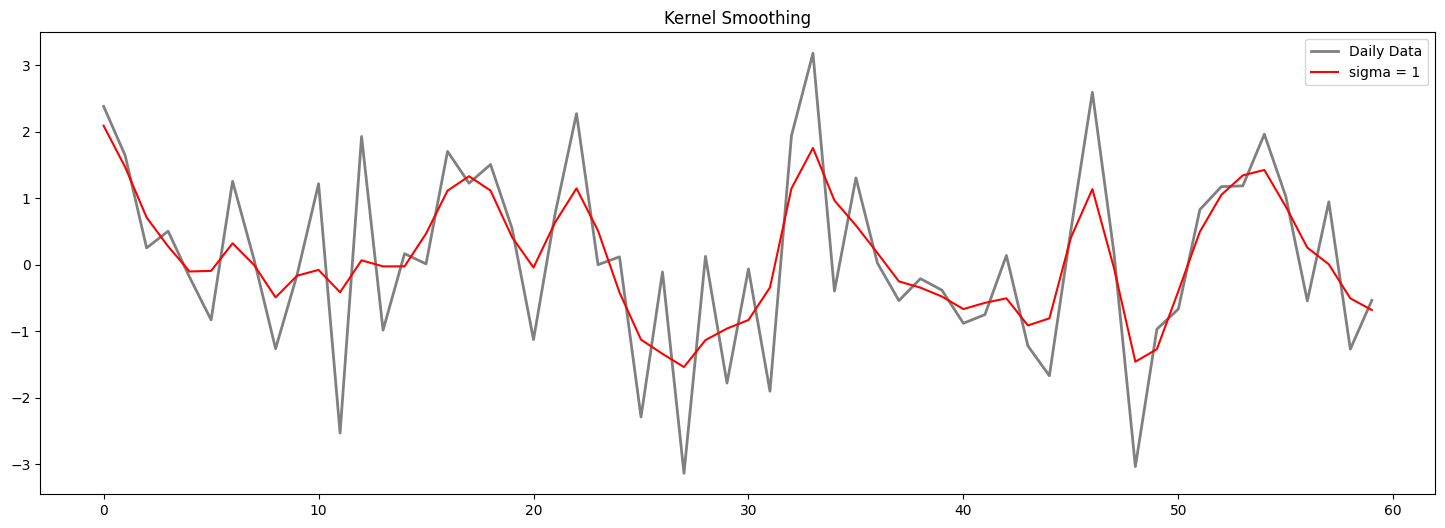

In [4]:
fig, ax = plt.subplots(figsize=(18, 6))

ax.plot(
    X_train[0],
    linestyle="-",
    linewidth=2,
    label="Daily Data",
    color="grey",
)

ax.plot(
    gaussian_filter1d(X_train[0], 0.9),
    color="red",
    markersize=1,
    linestyle="-",
    label="sigma = 1",
)


ax.set_title("Kernel Smoothing")
ax.legend()

In [10]:
optimal_sigma = kc.optimize_lambda(X_train, 2, [(0.2, 3)], 1)

In [ ]:
loss, clustering, kmedoids = kc.kernel_clustering(X_train, 3, 2)

In [19]:
cluster_test = []

for i in range(len(X_test)):
    cluster_test.append(kc.predict_cluster(X_test[i], kmedoids))


In [20]:
rand_score(y_test.reshape(-1), cluster_test)

0.5037956380286781